In [13]:
import SimpleITK as sitk
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image

In [14]:
def load_itk_image(filename):
    itkimage = sitk.ReadImage(filename)
    numpy_image = sitk.GetArrayFromImage(itkimage)
    
    numpy_origin = np.array(list(reversed(itkimage.GetOrigin())))
    # size of pixels
    numpy_spacing = np.array(list(reversed(itkimage.GetSpacing())))
    
    return numpy_image, numpy_origin, numpy_spacing

In [15]:
def readcsv(filename):
    lines = []
    with open(filename, "rt") as f:
        csvreader = csv.reader(f)
        for line in csvreader:
            lines.append(line)
    return lines

In [16]:
# world coordinates = real-life, voxel = in arrays
def world_to_voxel(world_coord, origin, spacing):
    stretched_voxel_coord = np.absolute(world_coord - origin)
    voxel_coord = stretched_voxel_coord / spacing
    return voxel_coord

In [17]:
def normalize_planes(npzarray):
    maxHU = 400.
    minHU = -1000.
    
    npzarray = (npzarray - minHU) / (maxHU - minHU)
    npzarray[npzarray > 1] = 1.
    npzarray[npzarray < 0] = 0.
    return npzarray

In [18]:
def image_details(img_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    print(numpy_image.shape)
    print(numpy_origin)
    print(numpy_spacing)   

In [19]:
image_details('/Users/kanetian7/LUNA16/data/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565.mhd')
image_details('/Users/kanetian7/LUNA16/data/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.109002525524522225658609808059.mhd')
image_details('/Users/kanetian7/LUNA16/data/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.111172165674661221381920536987.mhd')

(195, 512, 512)
[-385.2        -326.63867188 -184.63867188]
[ 1.79999995  0.72265625  0.72265625]
(161, 512, 512)
[-194.       -108.300003 -187.699997]
[ 1.25        0.54882801  0.54882801]
(538, 512, 512)
[-298.774994 -143.100006 -180.600006]
[ 0.625       0.74218798  0.74218798]


In [20]:
# visualize patch and save it
def visualize_cand(img_path, cand_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    #load candidates (points where nodules are centered)
    cands = readcsv(cand_path)
    for cand in cands[56049:56059]:
        world_coord = np.asarray([float(cand[3]), float(cand[2]), float(cand[1])])
        voxel_coord = world_to_voxel(world_coord, numpy_origin, numpy_spacing)
        voxel_width = 65
        #a rectangle slice of height x width at depth
        patch = numpy_image[int(voxel_coord[0]),
                            int(voxel_coord[1]-voxel_width/2):int(voxel_coord[1]+voxel_width/2),
                            int(voxel_coord[2]-voxel_width/2):int(voxel_coord[2]+voxel_width/2)]
        patch = normalize_planes(patch)
        
        print(world_coord)
        print(voxel_coord)
        print(patch)
        
#         output_dir = 'patches/'
        plt.imshow(patch, cmap = 'gray')
        plt.show()
#         Image.fromarray(patch*255).convert('L').save(os.path.join(output_dir, 'patch_' + str(world_coord[0]) + 
#                            '_' + str(world_coord[1]) + '_' + str(world_coord[2]) + '.tiff'))

[-213.979834   -132.2796206    74.03492678]
[  95.12231696  268.95090339  357.94833111]
[[ 0.71571429  0.69785714  0.47142857 ...,  0.10714286  0.1         0.11857143]
 [ 0.72214286  0.61571429  0.32357143 ...,  0.11357143  0.10571429  0.1       ]
 [ 0.67214286  0.49571429  0.18928571 ...,  0.14642857  0.17714286
   0.16928571]
 ..., 
 [ 0.08        0.12142857  0.30428571 ...,  0.13571429  0.15285714
   0.18714286]
 [ 0.085       0.06357143  0.14571429 ...,  0.12        0.13214286
   0.15928571]
 [ 0.10785714  0.14428571  0.20071429 ...,  0.09857143  0.10214286
   0.12142857]]


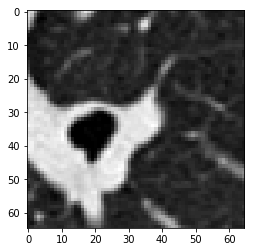

[-192.66 -127.79   60.18]
[ 106.9666695   275.16356757  338.77610811]
[[ 0.67571429  0.66928571  0.64714286 ...,  0.12428571  0.14785714
   0.09785714]
 [ 0.65142857  0.63142857  0.63642857 ...,  0.12642857  0.12071429
   0.10714286]
 [ 0.65428571  0.62642857  0.62571429 ...,  0.09285714  0.085       0.10714286]
 ..., 
 [ 0.75214286  0.75714286  0.75214286 ...,  0.49928571  0.38714286
   0.35214286]
 [ 0.74714286  0.76071429  0.77571429 ...,  0.36642857  0.33571429  0.35      ]
 [ 0.76214286  0.77357143  0.76285714 ...,  0.18071429  0.21714286
   0.23071429]]


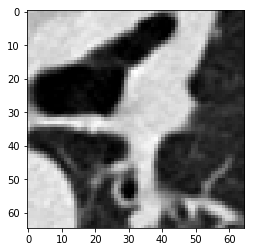

[-203.4432206 -126.8598307   82.7583269]
[ 100.97599123  276.45072076  370.01963074]
[[ 0.73428571  0.69785714  0.48571429 ...,  0.11642857  0.115       0.14071429]
 [ 0.71785714  0.71142857  0.57714286 ...,  0.10357143  0.11571429
   0.12642857]
 [ 0.68071429  0.65714286  0.54071429 ...,  0.09        0.08714286
   0.09357143]
 ..., 
 [ 0.14071429  0.135       0.13571429 ...,  0.14571429  0.20714286
   0.21214286]
 [ 0.165       0.13857143  0.11214286 ...,  0.12142857  0.18928571  0.22      ]
 [ 0.13357143  0.12714286  0.12642857 ...,  0.14857143  0.17214286
   0.18785714]]


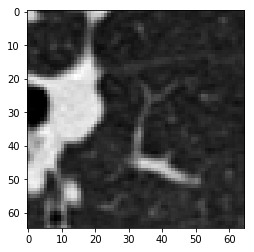

[-150.6812045 -159.256095   103.1162988]
[ 130.28822317  231.62129557  398.19066212]
[[ 0.09642857  0.05642857  0.07642857 ...,  0.71714286  0.68        0.66428571]
 [ 0.11214286  0.08        0.08285714 ...,  0.82642857  0.69928571
   0.68071429]
 [ 0.11        0.11        0.10857143 ...,  0.91857143  0.72142857
   0.70142857]
 ..., 
 [ 0.10071429  0.07928571  0.09       ...,  0.09285714  0.095       0.17142857]
 [ 0.10285714  0.09714286  0.12214286 ...,  0.085       0.09571429
   0.18428571]
 [ 0.11785714  0.13142857  0.14142857 ...,  0.07214286  0.07642857
   0.19857143]]


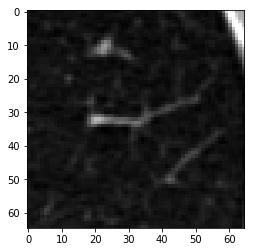

[-253.4  -150.14   78.96]
[  73.22222416  244.236       364.76356757]
[[ 0.77        0.74142857  0.75857143 ...,  0.09571429  0.09571429
   0.10857143]
 [ 0.73857143  0.73928571  0.79642857 ...,  0.10285714  0.095       0.08785714]
 [ 0.74285714  0.76714286  0.80357143 ...,  0.09785714  0.115       0.075     ]
 ..., 
 [ 0.23857143  0.08714286  0.12357143 ...,  0.15071429  0.18071429
   0.15785714]
 [ 0.335       0.13214286  0.11857143 ...,  0.13142857  0.14857143
   0.13642857]
 [ 0.44        0.22071429  0.12       ...,  0.14785714  0.15142857  0.125     ]]


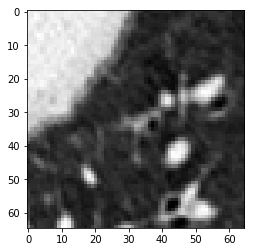

[-245.92 -143.73  -37.47]
[  77.37777983  253.10605405  203.64962162]
[[ 0.07714286  0.095       0.12857143 ...,  0.72        0.74571429
   0.76714286]
 [ 0.10857143  0.18285714  0.23714286 ...,  0.73428571  0.71        0.74214286]
 [ 0.16357143  0.19857143  0.18714286 ...,  0.72285714  0.72857143
   0.75214286]
 ..., 
 [ 0.11071429  0.14214286  0.17428571 ...,  0.28071429  0.235       0.28714286]
 [ 0.115       0.11142857  0.18142857 ...,  0.21785714  0.20642857
   0.28428571]
 [ 0.105       0.09142857  0.14357143 ...,  0.185       0.23        0.26571429]]


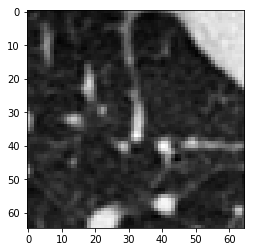

[-97.88301907 -92.93132097 -62.01250777]
[ 159.62054919  323.40044233  169.68809736]
[[ 0.52285714  0.35071429  0.21071429 ...,  0.13857143  0.11857143
   0.10428571]
 [ 0.52642857  0.33571429  0.22071429 ...,  0.13428571  0.13357143  0.12      ]
 [ 0.56857143  0.38        0.23785714 ...,  0.08571429  0.11214286
   0.13928571]
 ..., 
 [ 0.80428571  0.80928571  0.77785714 ...,  0.675       0.68357143
   0.70142857]
 [ 0.76        0.79428571  0.77357143 ...,  0.69214286  0.71        0.69571429]
 [ 0.74        0.75642857  0.76071429 ...,  0.74        0.74642857
   0.72285714]]


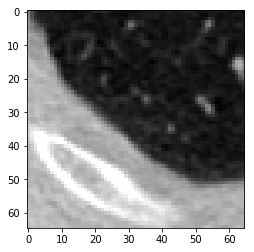

[-216.5316183  -116.1243593   -11.44110785]
[  93.70465898  291.306292    239.66798049]
[[ 0.21357143  0.135       0.11857143 ...,  0.70071429  0.74428571
   0.71214286]
 [ 0.21785714  0.12714286  0.11142857 ...,  0.7         0.735       0.71928571]
 [ 0.19642857  0.13785714  0.135      ...,  0.70928571  0.70857143
   0.70714286]
 ..., 
 [ 0.21142857  0.15714286  0.15142857 ...,  0.88285714  0.89785714  0.88      ]
 [ 0.23642857  0.13714286  0.12       ...,  0.91285714  0.92785714  0.875     ]
 [ 0.18571429  0.14714286  0.13       ...,  0.88285714  0.91214286
   0.87928571]]


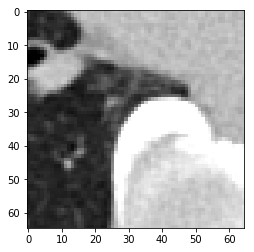

[-125.3176058   -90.58831007  -62.09718755]
[ 144.37911171  326.64266282  169.57091885]
[[ 0.12        0.11571429  0.10571429 ...,  0.29357143  0.45785714
   0.51571429]
 [ 0.11785714  0.09571429  0.08857143 ...,  0.53071429  0.70857143
   0.73142857]
 [ 0.11142857  0.12214286  0.10214286 ...,  0.62857143  0.78714286
   0.77928571]
 ..., 
 [ 0.67142857  0.77857143  0.93928571 ...,  0.64142857  0.65142857  0.645     ]
 [ 0.67785714  0.71857143  0.79785714 ...,  0.62928571  0.62142857
   0.63142857]
 [ 0.67142857  0.68142857  0.7        ...,  0.66714286  0.67928571
   0.69214286]]


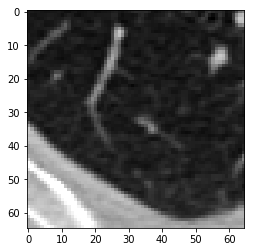

[-218.9878381  -118.3740543   -62.23578671]
[  92.34009239  288.19320054  169.37912758]
[[ 0.09785714  0.09857143  0.11928571 ...,  0.13642857  0.175       0.22928571]
 [ 0.08571429  0.09428571  0.12142857 ...,  0.11785714  0.15785714
   0.25785714]
 [ 0.07571429  0.08071429  0.13285714 ...,  0.10785714  0.12071429
   0.14785714]
 ..., 
 [ 0.09428571  0.11357143  0.13785714 ...,  0.17214286  0.22285714
   0.23142857]
 [ 0.12857143  0.14928571  0.14714286 ...,  0.18142857  0.25214286
   0.21357143]
 [ 0.15071429  0.13714286  0.12857143 ...,  0.18785714  0.19285714
   0.14071429]]


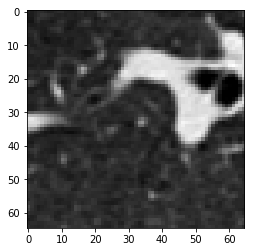

In [21]:
visualize_cand('/Users/kanetian7/LUNA16/data/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565.mhd', 
          '/Users/kanetian7/LUNA16/data/candidates_V2.csv')

In [22]:
def visualize_slice(img_path):
    numpy_image, numpy_origin, numpy_spacing = load_itk_image(img_path)
    patch = numpy_image[int(numpy_image.shape[0]/2),
                        0:511,
                        0:511]
    plt.imshow(patch)
    plt.show()

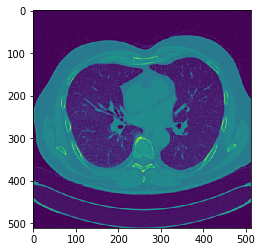

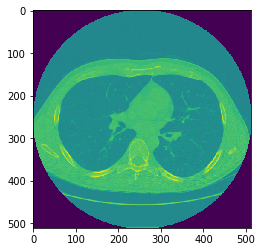

In [23]:
visualize_slice('/Users/kanetian7/LUNA16/data/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.124154461048929153767743874565.mhd')
visualize_slice('/Users/kanetian7/LUNA16/data/subset0/1.3.6.1.4.1.14519.5.2.1.6279.6001.105756658031515062000744821260.mhd')